In [1]:
import os
os.environ['XLA_PYTHON_CLIENT_MEM_FRACTION'] = '.1'

from algorithms.utils import restore_state_multi_agent
import numpy as np
import jax
import jax.numpy as jnp
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
directory = '/media/samuele/Disco/PycharmProjectsUbuntu/MARL-CER/trained_agents_to_keep/trained_agents_for_paper/20250606_090550_bat_net_type_actor_critic_rec_net_type_mlp_lr_bat_5e-05_lr_REC_None_tot_timesteps_28032000_lr_sched_None_multiagent'

networks_batteries, network_rec, config, world_metadata, train_info, val_info = restore_state_multi_agent(directory)

ActorCritic ('temperature', 'soc', 'demand', 'generation', 'buying_price', 'selling_price', 'sin_day_of_year', 'cos_day_of_year', 'sin_seconds_of_day', 'cos_seconds_of_day', 'network_REC_plus', 'network_REC_minus') ('temperature', 'soc', 'demand', 'generation', 'buying_price', 'selling_price', 'sin_day_of_year', 'cos_day_of_year', 'sin_seconds_of_day', 'cos_seconds_of_day', 'network_REC_plus', 'network_REC_minus')
norm batt
RECMLP ('demands_base_battery_houses', 'demands_battery_battery_houses', 'generations_battery_houses', 'mean_demands_base', 'mean_demands_batteries', 'mean_generations', 'sin_day_of_year', 'cos_day_of_year', 'sin_seconds_of_day', 'cos_seconds_of_day', 'network_REC_plus', 'network_REC_minus')
norm rec


In [3]:
config

{'ACTIVATION': 'tanh',
 'BATTERY_ACTION_SPACE_SIZE': 1,
 'BATTERY_OBS_IS_NORMALIZABLE': {'buying_price': True,
  'cos_day_of_year': False,
  'cos_seconds_of_day': False,
  'demand': True,
  'generation': True,
  'network_REC_minus': True,
  'network_REC_plus': True,
  'selling_price': True,
  'sin_day_of_year': False,
  'sin_seconds_of_day': False,
  'soc': False,
  'temperature': True},
 'BATTERY_OBS_IS_SEQUENCE': {'buying_price': True,
  'cos_day_of_year': False,
  'cos_seconds_of_day': False,
  'demand': True,
  'generation': True,
  'network_REC_minus': True,
  'network_REC_plus': True,
  'selling_price': True,
  'sin_day_of_year': False,
  'sin_seconds_of_day': False,
  'soc': True,
  'temperature': True},
 'BATTERY_OBS_KEYS': ('temperature',
  'soc',
  'demand',
  'generation',
  'buying_price',
  'selling_price',
  'sin_day_of_year',
  'cos_day_of_year',
  'sin_seconds_of_day',
  'cos_seconds_of_day',
  'network_REC_plus',
  'network_REC_minus'),
 'BATTERY_VALUES_IN_REC_OBS_CRI'

In [4]:
world_metadata

WorldMetadata(world_train={'num_battery_houses': 3, 'battery_observations': ['demand', 'generation', 'temperature', 'soc', 'day_of_year', 'seconds_of_day', 'selling_price', 'buying_price', 'network_REC_plus', 'network_REC_minus'], 'rec_observations': ['demands_base_battery_houses', 'demands_battery_battery_houses', 'generations_base_battery_houses', 'mean_demands_base', 'mean_demands_batteries', 'mean_generations', 'day_of_year', 'seconds_of_day', 'network_REC_plus', 'network_REC_minus'], 'demand': {'path': 'ernestogym/ernesto_jax/data/demand/rse_profiles_train.csv', 'timestep': 3600, 'test_profiles': None, 'data_usage': 'end'}, 'generation': {'path': {'battery_houses_generation': ['ernestogym/ernesto_jax/data/generation/Timeseries_45.235_10.693_SA3_3kWp_crystSi_14_30deg_-60deg_2015_2018._train.csv', 'ernestogym/ernesto_jax/data/generation/Timeseries_45.235_10.693_SA3_3kWp_crystSi_14_30deg_0deg_2015_2018._train.csv', 'ernestogym/ernesto_jax/data/generation/Timeseries_45.235_10.693_SA3_

In [5]:
jax.tree.map(lambda x: jnp.isnan(x).any(axis=jnp.arange(1, x.ndim)), train_info)

{}

In [6]:
jax.tree.map(lambda x: x.shape, val_info)

{'actions_batteries': (22, 43350, 3),
 'actions_rec': (22, 43350, 3),
 'balance_minus': (22, 43350),
 'balance_plus': (22, 43350),
 'buy_prices': (22, 43350, 3),
 'demands': (22, 43350, 3),
 'dones': {'REC_agent': (22, 43350),
  '__all__': (22, 43350),
  'battery_agent_0': (22, 43350),
  'battery_agent_1': (22, 43350),
  'battery_agent_2': (22, 43350)},
 'energy_to_batteries': (22, 43350, 3),
 'generations': (22, 43350, 3),
 'norm_reward': {'r_clipping': (22, 43350, 3),
  'r_deg': (22, 43350, 3),
  'r_glob': (22, 43350, 3),
  'r_op': (22, 43350, 3),
  'r_trad': (22, 43350, 3)},
 'pure_reward': {'r_clipping': (22, 43350, 3),
  'r_deg': (22, 43350, 3),
  'r_glob': (22, 43350, 3),
  'r_op': (22, 43350, 3),
  'r_trad': (22, 43350, 3)},
 'r_tot': (22, 43350, 3),
 'rec_reward': (22, 43350),
 'self_consumption': (22, 43350),
 'sell_prices': (22, 43350, 3),
 'soc': (22, 43350, 3),
 'soh': (22, 43350, 3),
 'tot_incentives': (22, 43350),
 'weig_reward': {'r_clipping': (22, 43350, 3),
  'r_deg': 

In [7]:
val_info['actions_rec']

array([[[3.29223156e-01, 3.40318829e-01, 3.30458015e-01],
        [3.27906817e-01, 3.40956360e-01, 3.31136793e-01],
        [3.28791052e-01, 3.41610104e-01, 3.29598784e-01],
        ...,
        [3.26516062e-01, 3.40218931e-01, 3.33265007e-01],
        [3.28021288e-01, 3.39513689e-01, 3.32464963e-01],
        [3.28249425e-01, 3.38682324e-01, 3.33068252e-01]],

       [[4.99096625e-02, 2.94512600e-01, 6.55577660e-01],
        [6.23687729e-02, 3.44827235e-01, 5.92804015e-01],
        [1.04446225e-01, 3.84209722e-01, 5.11344075e-01],
        ...,
        [5.66352785e-01, 5.26082739e-02, 3.81038994e-01],
        [6.82280421e-01, 3.89929414e-02, 2.78726578e-01],
        [8.38137150e-01, 1.80640910e-02, 1.43798769e-01]],

       [[4.67738152e-01, 1.33991942e-01, 3.98269922e-01],
        [6.17286444e-01, 1.42478362e-01, 2.40235239e-01],
        [7.26306796e-01, 7.73590133e-02, 1.96334168e-01],
        ...,
        [9.87358153e-01, 1.42792403e-03, 1.12138428e-02],
        [9.95965600e-01, 4.37

In [8]:
val_info['r_tot'].shape #.sum(axis=(1, 2)).shape

(22, 43350, 3)

In [9]:
lim = config['NUM_RL_AGENTS'] if 'NUM_RL_AGENTS' in config.keys() else config['NUM_BATTERY_AGENTS']
a = val_info['r_tot'][..., :lim].sum(axis=(1, 2))
a

array([-3690.1165, -3105.5093, -2632.3079, -2361.2725, -2286.723 ,
       -2246.5898, -2222.73  , -2206.522 , -2211.391 , -2212.1086,
       -2232.5422, -2254.6543, -2255.2217, -2269.7217, -2304.7983,
       -2284.6157, -2302.1055, -2310.6125, -2316.743 , -2327.5635,
       -2334.7   , -2339.9285], dtype=float32)

In [10]:
val_info['r_tot'].shape

(22, 43350, 3)

In [11]:
val_info['r_tot'][7, :].sum(axis=0)

array([-454.044  , -921.84   , -830.63306], dtype=float32)

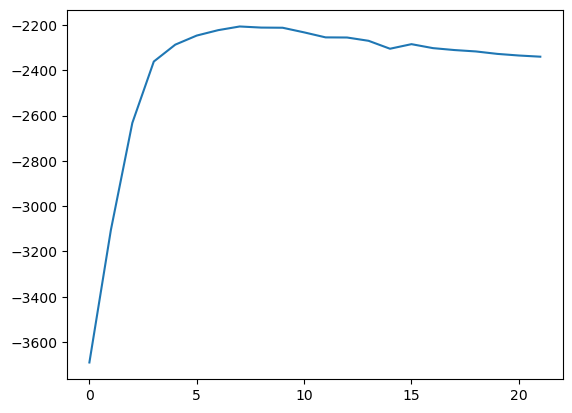

In [12]:
plt.plot(a)

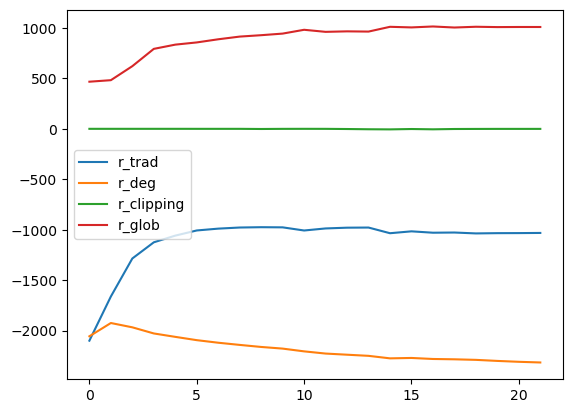

In [13]:
plt.plot(val_info['weig_reward']['r_trad'][..., :lim].sum(axis=(1, 2)), label='r_trad')
plt.plot(val_info['weig_reward']['r_deg'][..., :lim].sum(axis=(1, 2)), label='r_deg')
plt.plot(val_info['weig_reward']['r_clipping'][..., :lim].sum(axis=(1, 2)), label='r_clipping')
plt.plot(val_info['weig_reward']['r_glob'][..., :lim].sum(axis=(1, 2)), label='r_glob')
plt.legend()

In [14]:
cmap = mpl.colormaps['plasma']
n_agents = config['NUM_BATTERY_AGENTS']
colors = cmap(np.linspace(0, 1, n_agents))

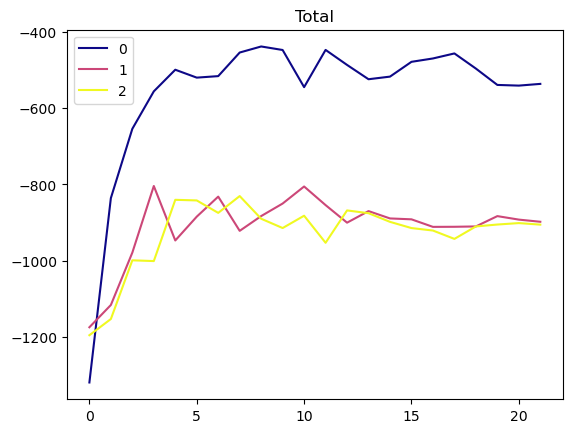

In [15]:
for i in range(n_agents):
    plt.plot(val_info['r_tot'].sum(axis=1)[:, i], color=colors[i], label=f'{i}')
    plt.title('Total')
    plt.legend()

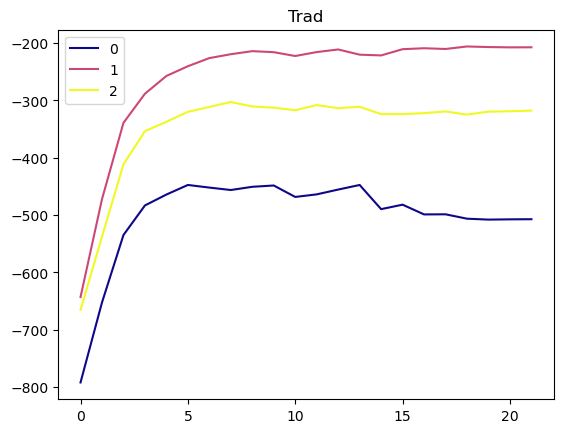

In [16]:
for i in range(n_agents):
    plt.plot(val_info['weig_reward']['r_trad'].sum(axis=1)[:, i], color=colors[i], label=f'{i}')
    plt.title('Trad')
    plt.legend()

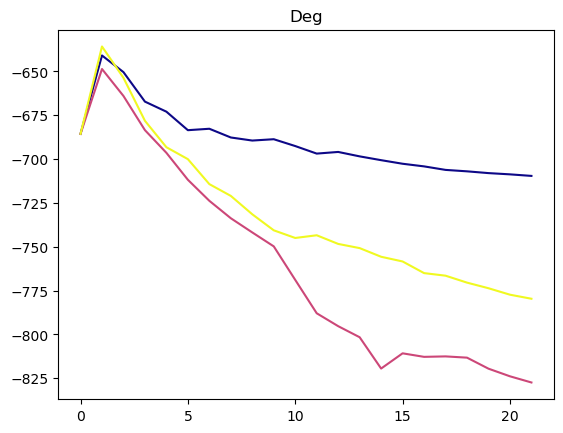

In [17]:
for i in range(n_agents):
    plt.plot(val_info['weig_reward']['r_deg'].sum(axis=1)[:, i], color=colors[i])
    plt.title('Deg')

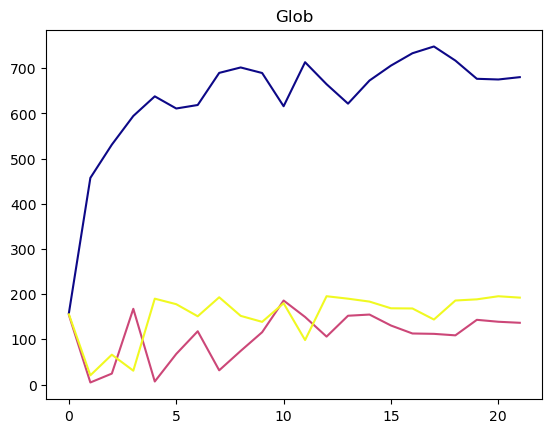

In [18]:
for i in range(n_agents):
    plt.plot(val_info['weig_reward']['r_glob'].sum(axis=1)[:, i], color=colors[i])
    plt.title('Glob')

In [19]:
val_info['self_consumption'].sum(axis=1)

array([ 5040197. ,  5208091. ,  6740282.5,  8612844. ,  9075825. ,
        9315312. ,  9652780. ,  9936800. , 10089524. , 10254693. ,
       10653672. , 10426497. , 10481883. , 10458414. , 10962670. ,
       10899406. , 11001595. , 10886610. , 10969833. , 10933201. ,
       10945369. , 10943532. ], dtype=float32)

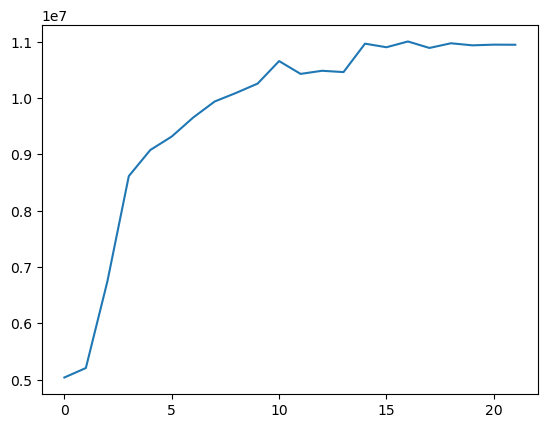

In [20]:
plt.plot(val_info['self_consumption'].sum(axis=1))

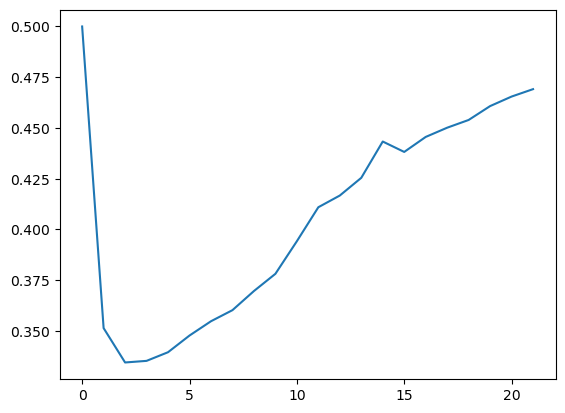

In [21]:
plt.plot(val_info['soc'][..., :lim].mean(axis=(1, 2)))

In [22]:
np.var(val_info['actions_rec'], axis=-1).shape

(22, 43350)

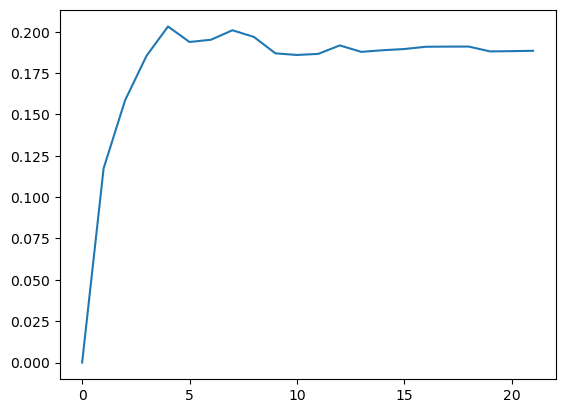

In [23]:
plt.plot(np.var(val_info['actions_rec'], axis=-1).mean(axis=1))

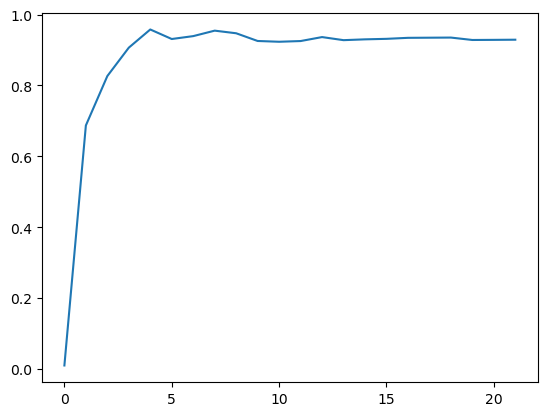

In [24]:
plt.plot(np.mean(np.max(val_info['actions_rec'], axis=-1) - np.min(val_info['actions_rec'], axis=-1), axis=1))